In [20]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import shap
%config InlineBackend.figure_format = 'retina'

In [55]:
from sklearn.model_selection import train_test_split
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [56]:
import xgboost
import lightgbm as lgb
model = xgboost.XGBClassifier(max_depth=2, n_estimators=500, subsample=0.5, learning_rate=0.05)
model.fit(X, y)

# build explanation
import shap
explainer = shap.TreeExplainer(model, shap.sample(X, 100))
shap_values = explainer.shap_values(X)
    
shap_values 

[21:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 99%|===================| 32349/32561 [01:29<00:00]        

array([[ 0.58843369, -0.27712428,  0.66076606, ..., -0.10465716,
         0.02402103,  0.01020583],
       [ 0.84156809, -0.24368496,  0.85232297, ..., -0.11178743,
        -0.93584142,  0.0117239 ],
       [ 0.54520194,  0.01638394, -0.23025455, ..., -0.10015949,
         0.01786834,  0.0123713 ],
       ...,
       [ 0.81591808,  0.01668868, -0.21946964, ..., -0.10894507,
         0.02536851,  0.01008285],
       [-1.59342131,  0.00391539, -0.18760817, ..., -0.10463974,
        -0.94511881,  0.0085604 ],
       [ 0.78409548,  0.04836384, -0.27725437, ..., -0.07595078,
         0.07583869,  0.00924356]])

In [53]:
explainer.expected_value

-1.7928828221671207

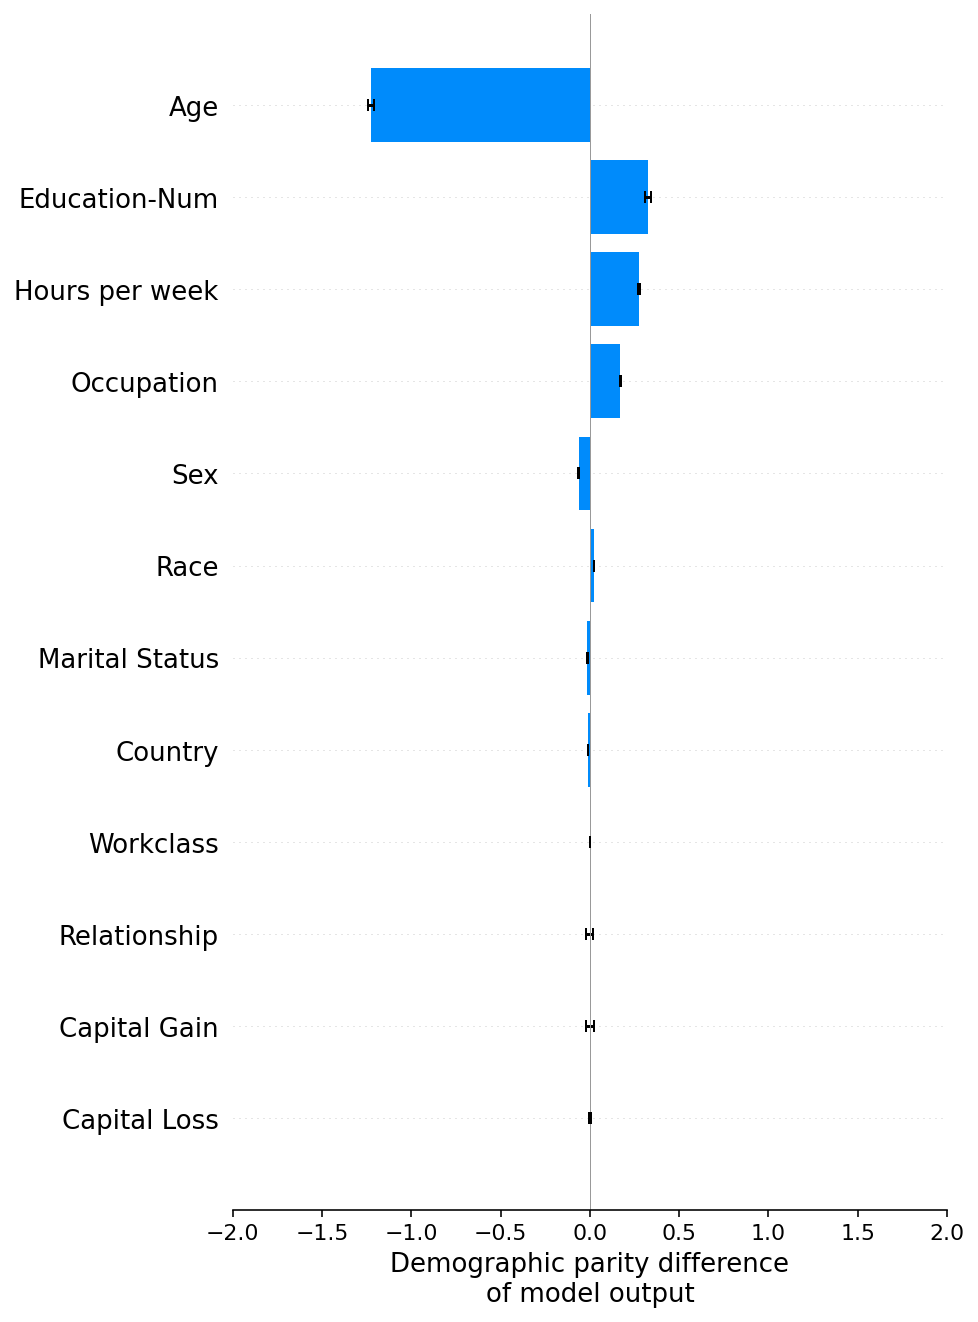

In [54]:
model_outputs_A = explainer.expected_value + shap_values.sum(1)
glabel = "Demographic parity difference\nof model output"
xmin = -2
xmax = 2
shap.group_difference_plot(shap_values, X["Sex"],X.columns, xmin=xmin, xmax=xmax, xlabel=glabel)

In [57]:
import lightgbm as lgb
model = lgb.LGBMClassifier(max_depth=2, n_estimators=500, subsample=0.5, learning_rate=0.05)
model.fit(X, y)

# build explanation
import shap
explainer = shap.TreeExplainer(model, shap.sample(X, 100))
shap_values = explainer.shap_values(X)
    
shap_values 

100%|===================| 32487/32561 [01:28<00:00]        

array([[ 0.62833026, -0.2694506 ,  0.69749706, ..., -0.10720068,
        -0.00266238,  0.0102087 ],
       [ 0.80889662, -0.25239707,  0.80975726, ..., -0.11205072,
        -0.89993862,  0.01033005],
       [ 0.55344123,  0.01419947, -0.2473258 , ..., -0.10586323,
         0.01539715,  0.01022537],
       ...,
       [ 0.73434411,  0.01486965, -0.22827674, ..., -0.11659527,
         0.00559069,  0.01010403],
       [-1.39468887,  0.00864231, -0.17796328, ..., -0.12320739,
        -0.96604901,  0.0063991 ],
       [ 0.76228579,  0.02841806, -0.29010889, ..., -0.05574578,
         0.02471659, -0.00907638]])

FixedFormatter should only be used together with FixedLocator


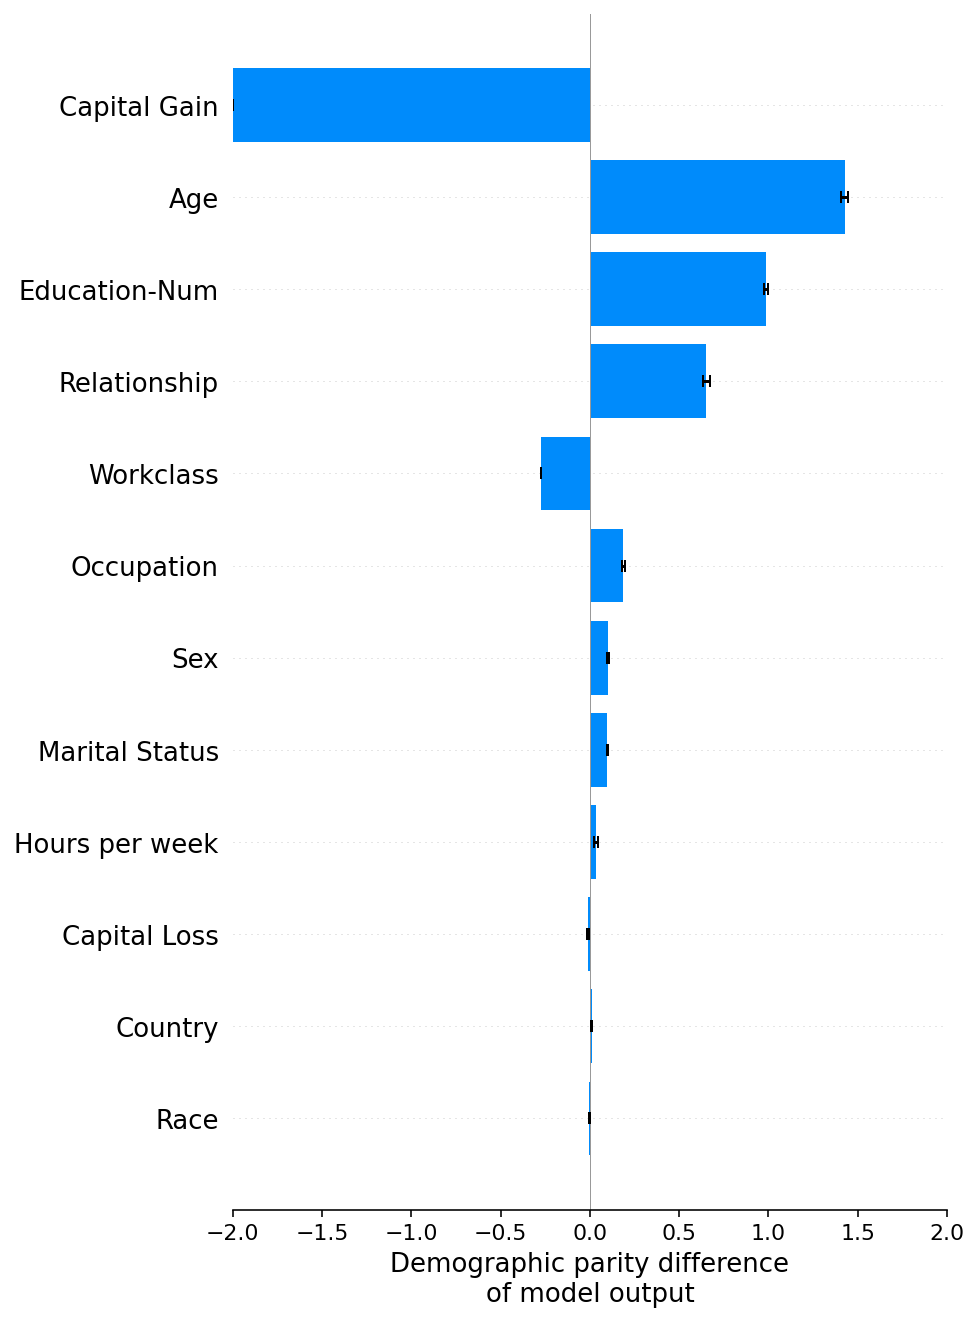

In [58]:
model_outputs_A = explainer.expected_value + shap_values.sum(1)
glabel = "Demographic parity difference\nof model output"
xmin = -2
xmax = 2
shap.group_difference_plot(shap_values, X["Sex"],X.columns, xmin=xmin, xmax=xmax, xlabel=glabel)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, n_estimators=500)
model.fit(X, y)

import shap
explainer = shap.TreeExplainer(model, shap.sample(X, 100))
shap_values = explainer.shap_values(X)
    
shap_values 

100%|===================| 64947/65122 [05:27<00:00]        

[array([[-1.73904182e-02, -6.42819603e-04, -6.23856102e-02, ...,
          5.76170236e-03,  1.44771872e-02, -6.54432198e-05],
        [-2.06545060e-02, -5.66683701e-04, -1.01408747e-01, ...,
          7.63113964e-03,  1.97822187e-02, -2.11458809e-04],
        [-1.29335008e-02, -1.31202658e-04,  2.32866396e-02, ...,
          6.11953963e-03,  1.25358075e-02, -6.30331852e-05],
        ...,
        [-1.21540684e-02,  6.64570876e-06,  2.00655379e-02, ...,
          5.72884371e-03,  1.26550770e-02, -6.31292621e-05],
        [ 2.90914465e-02,  4.23772855e-06,  1.80744906e-02, ...,
          5.51302148e-03,  1.46772966e-02, -6.04817394e-05],
        [-1.42292533e-02, -7.39035106e-04,  2.25654759e-02, ...,
          5.63726005e-03,  7.97064547e-03, -1.83549646e-04]]),
 array([[ 1.73904184e-02,  6.42819495e-04,  6.23856100e-02, ...,
         -5.76170236e-03, -1.44771871e-02,  6.54432154e-05],
        [ 2.06545060e-02,  5.66683654e-04,  1.01408746e-01, ...,
         -7.63113961e-03, -1.97822187e